# Exercise 1 - Regression with sequential model

Write a ML regression model using TensorFlow/Keras's sequential model with the following steps:

**Data Loading**

1. Download the data with:
    ```
    wget https://raw.githubusercontent.com/scarrazza/DL2025/main/Lecture_4/data.dat
    # or (on OSX)
    curl https://raw.githubusercontent.com/scarrazza/DL2025/main/Lecture_4/data.dat -o data.dat
    ```
    This file contains an undefined number of data points already divided into training and validation (x_tr, y_tr, x_val, y_val). The data is 2D dimensional.

2. Load and plot data for training and validation.

2025-04-04 16:19:57.609688: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-04 16:19:57.770014: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-04 16:19:57.928733: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743776398.063802    7446 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743776398.104111    7446 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-04 16:19:58.422762: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

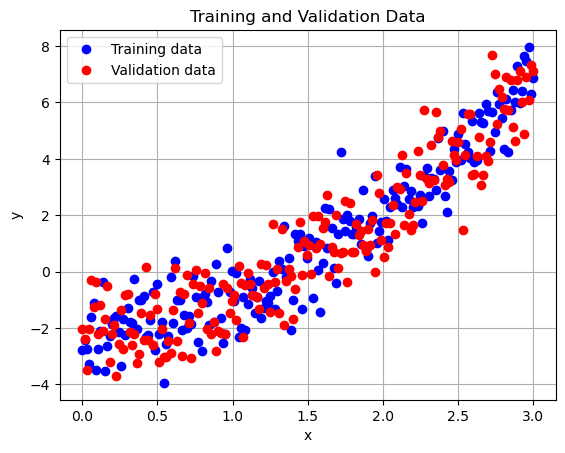

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load dataset data.dat (x_tr,y_tr,x_val,y_val)
x_tr, y_tr, x_val, y_val = np.loadtxt('data.dat', unpack=True)

#convert to tensors
x_tr = tf.convert_to_tensor(x_tr, dtype=tf.float32)
y_tr = tf.convert_to_tensor(y_tr, dtype=tf.float32)
x_val = tf.convert_to_tensor(x_val, dtype=tf.float32)
y_val = tf.convert_to_tensor(y_val, dtype=tf.float32)

plt.plot(x_tr, y_tr, 'bo', label='Training data')
plt.plot(x_val, y_val, 'ro', label='Validation data')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Training and Validation Data')
plt.grid()
plt.legend()
plt.show()

**Baseline linear fit**

3. Create a baseline linear model (dense layer with 1 unit node) and store the instance of this class in a variable called `model`.

4. Compile `model` using:
    - the mean squared error as loss function,
    - the `tensorflow.keras.optimizers.SGD` class with learning rate 0.01 as optimizer.

5. Perform a fit with `model.fit` with full batch size and 500 epochs. Monitor the validation data during epochs.

6. Plot the loss function for training and validation using the history object returned by `model.fit`.

7. Plot the model prediction on top of data.

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 8.1784 - val_loss: 6.2027
Epoch 2/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5.6664 - val_loss: 5.1790
Epoch 3/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.3574 - val_loss: 4.8109
Epoch 4/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4.7918 - val_loss: 4.5187
Epoch 5/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4.2847 - val_loss: 4.3320
Epoch 6/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4.3636 - val_loss: 4.1603
Epoch 7/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4.1015 - val_loss: 4.0081
Epoch 8/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3.7004 - val_loss: 3.8690
Epoch 9/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3.6055 - val_loss: 3.7271
Epoch 10/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3.7635 - val_loss: 3.5977
Epoch 11/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3.2178 - val_loss: 3.4729
Epoch 12/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3.3483 - val_lo

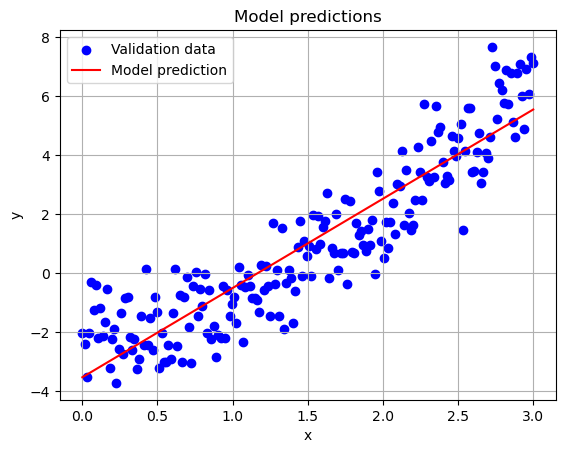

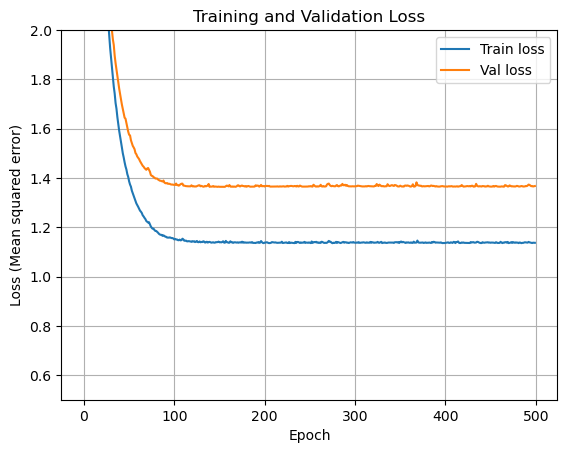

In [4]:
def create_baseline_model():
    model = tf.keras.models.Sequential() # Create a Sequential model
    model.add(tf.keras.layers.Dense(1, input_shape=(1,))) # Add a Dense layer with 1 unit and input shape of 1, Linear regression
    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss="mean_squared_error")
    return model

def plot_history(history, title):
    plt.figure()
    plt.plot(history.epoch, np.array(history.history["loss"]), label="Train loss")
    plt.plot(history.epoch, np.array(history.history["val_loss"]), label="Val loss")
    plt.title(title)
    plt.xlabel("Epoch")
    plt.ylabel("Loss (Mean squared error)")
    plt.ylim(0.5, 2)
    plt.grid()
    plt.legend()


def plot_results(X, Y, Y_predict, title):
    plt.figure()
    plt.scatter(X, Y, color="blue", label="Validation data")
    plt.plot(X, Y_predict, color="red", label="Model prediction")
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid()
    plt.legend()

# Create the model
model = create_baseline_model()

# Print model summary 
model.summary()

# Train the model
history = model.fit(x_tr, y_tr, batch_size= x_tr.shape[0], epochs = 500, validation_data=(x_val, y_val))

# Evaluate the model
loss = model.evaluate(x_val, y_val, verbose=2)
print(f"Validation loss: {loss}")
# Predict
y_predict = model.predict(x_val)

# Plot the results
plot_results(x_val, y_val, y_predict, "Model predictions")
plot_history(history, "Training and Validation Loss")
plt.show()

We're not seeing overfit, even after many epochs, it means that our model is not expressive enough to describe these data, there's a bias in our choice of the model. We're missing something.


**NN model fit**

8. Build a neural network model with 3 layers containing 10 nodes each and `relu` activation function and a last layer with a single unit and linear activation function.

9. Perform a fit using the same setup in 4-6.

10. Plot the loss function history for training and validation.

11. Plot the model prediction on top of data.

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 50)             │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,251 (20.51 KB)

 Trainable params: 5,251 (20.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
1/1 - 0s - 424ms/step - loss: 8.7748 - val_loss: 8.1789
Epoch 2/500
1/1 - 0s - 92ms/step - loss: 8.1974 - val_loss: 7.7127
Epoch 3/500
1/1 - 0s - 93ms/step - loss: 7.7213 - val_loss: 7.3311
Epoch 4/500
1/1 - 0s - 90ms/step - loss: 7.3307 - val_loss: 6.9353
Epoch 5/500
1/1 - 0s - 91ms/step - loss: 6.9247 - val_loss: 6.5536
Epoch 6/500
1/1 - 0s - 91ms/step - loss: 6.5324 - val_loss: 6.1842
Epoch 7/500
1/1 - 0s - 90ms/step - loss: 6.1515 - val_loss: 5.8322
Epoch 8/500
1/1 - 0s - 89ms/step - loss: 5.7875 - val_loss: 5.5138
Epoch 9/500
1/1 - 0s - 89ms/step - loss: 5.4566 - val_loss: 5.2484
Epoch 10/500
1/1 - 0s - 92ms/step - loss: 5.1790 - val_loss: 5.0253
Epoch 11/500
1/1 - 0s - 89ms/step - loss: 4.9444 - val_loss: 4.8475
Epoch 12/500
1/1 - 0s - 91ms/step - loss: 4.7564 - val_loss: 4.6981
Epoch 13/500
1/1 - 0s - 100ms/step - loss: 4.5983 - val_loss: 4.5685
Epoch 14/500
1/1 - 0s - 90ms/step - loss: 4.4613 - val_loss: 4.4441
Epoch 15/500
1/1 - 0s - 89ms/step - loss: 4.3310 - val_

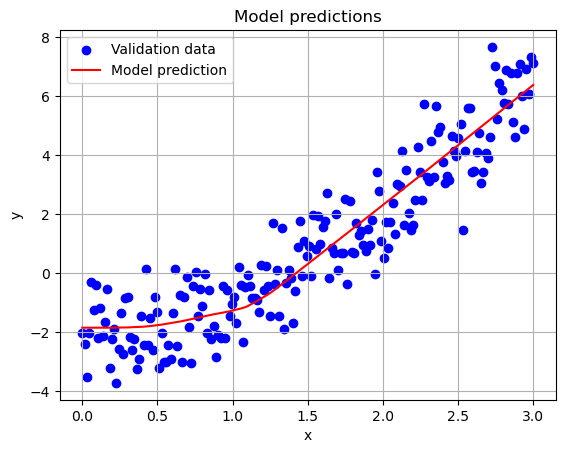

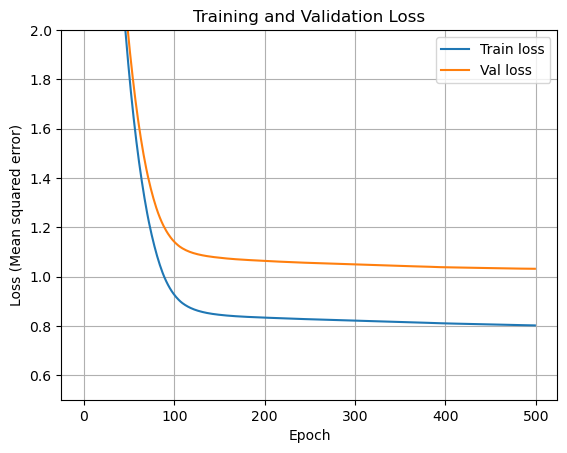

In [ ]:
def create_nn_model():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(10, activation = "relu", input_dim=1))
    model.add(tf.keras.layers.Dense(10, activation = "relu"))
    model.add(tf.keras.layers.Dense(10, activation = "relu"))
    model.add(tf.keras.layers.Dense(1, activation = "linear")) # default is linear
    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss="mean_squared_error")
    return model

# Create the model
model = create_nn_model()
# model summary
model.summary()
# Train the model
history = model.fit(x_tr, y_tr, batch_size= x_tr.shape[0],verbose=2, epochs=500, validation_data=(x_val, y_val))
# Evaluate the model
loss = model.evaluate(x_val, y_val, verbose=2)
print(f"Validation loss: {loss}")
# Predict
y_predict = model.predict(x_val)
# Plot the results
plot_results(x_val, y_val, y_predict, "Model predictions")
plot_history(history, "Training and Validation Loss")
plt.show()

Even with a bigger Neural Network there's no overfitting, we can go ahead and increase the dimension of the model, increase epochs or learning rate.
After reaching "overfit" where the validation error starts to increase it means our model is learning statistical fluctuations.

## Exercise 2 - Classification with sequential model

Write a ML classification model using keras with the following steps:

**Data loading**

1. Load the fashion mnist dataset from `tensorflow.keras.datasets.fashion_mnist`. Study the dataset size (pixel shape) and plot some sample images. This dataset contains the following classes `['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']`.

2. Normalize images for training and test, considering the maximum pixel value of 255.


Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


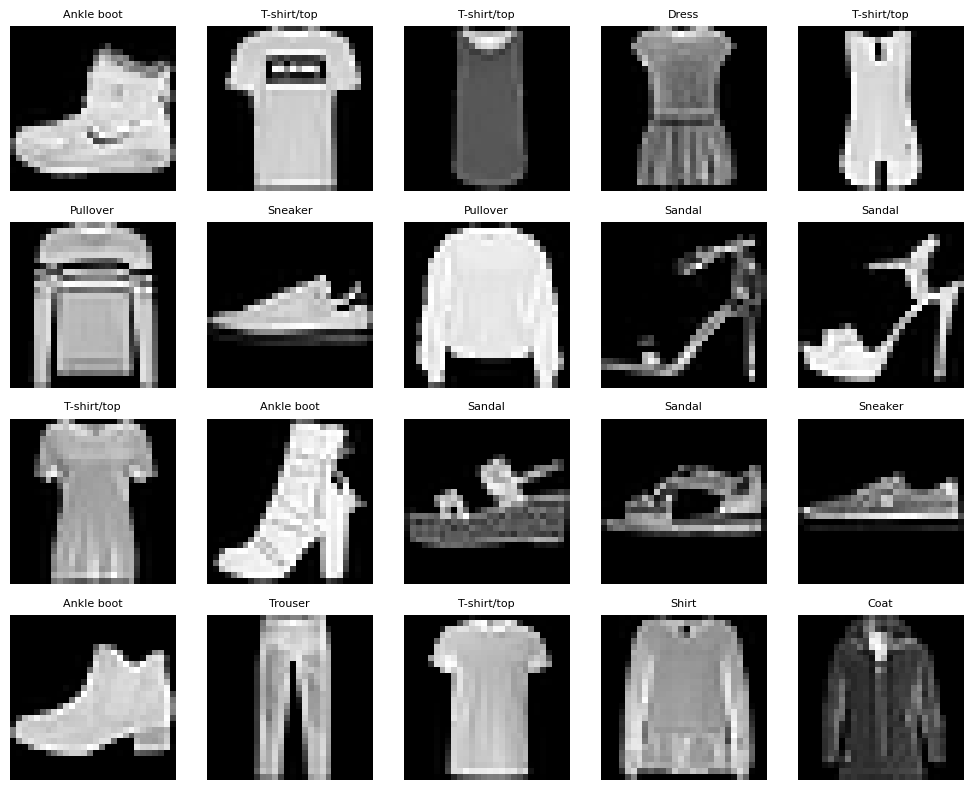

In [8]:
import math
# Load dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# Class labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Dataset shape
print("Training data shape:", train_images.shape)
print("Test data shape:", test_images.shape)

# Function to plot N images with 5 per row
def plot_first_n_images(images, labels, class_names, N):
    images_per_row = 5
    rows = math.ceil(N / images_per_row)
    plt.figure(figsize=(images_per_row * 2, rows * 2))
    
    for i in range(N):
        plt.subplot(rows, images_per_row, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(class_names[labels[i]], fontsize=8)
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Example usage:
N = 20  # Set to any number of images you'd like to display
plot_first_n_images(train_images, train_labels, class_names, N)

In [9]:
# Normalize pixel values to [0, 1] range
train_images = train_images / 255.0
test_images = test_images / 255.0


**NN model fit**

3. Build a NN model with flattens images and applies 2 dense layers with 128 and 10 units respectively. The first layer uses `relu` while the last layer `softmax`. Determine the number of trainable parameters.

4. Fit the dataset with 5 epochs, using `adam`'s optimizer, and the `sparse_categorical_crossentropy` loss function. The `Sequential.compile` method supports extra arguments, such as `metrics=['accuracy']` in order to monitor extra statistical estimators during epochs.

5. Evaluate test accuracy.

6. Identify examples of bad classification.

In [11]:
# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),          # Flatten image to 784
    tf.keras.layers.Dense(128, activation='relu'),          # First dense layer
    tf.keras.layers.Dense(10, activation='softmax')         # Output layer with softmax
    # output layer with 10 units for 10 classes
    # softmax: np.sum(out[i] for i in range(10)) == 1
])

# Summary to show number of trainable parameters
model.summary()

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=5, validation_split=0.1)
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("Test loss:", test_loss)
print("\nTest accuracy:", test_acc)

/home/jiahao/anaconda3/envs/tf/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7755 - loss: 0.6438 - val_accuracy: 0.8553 - val_loss: 0.4068
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8598 - loss: 0.3881 - val_accuracy: 0.8695 - val_loss: 0.3635
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8743 - loss: 0.3444 - val_accuracy: 0.8743 - val_loss: 0.3406
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8846 - loss: 0.3136 - val_accuracy: 0.8725 - val_loss: 0.3525
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8920 - loss: 0.2954 - val_accuracy: 0.8740 - val_loss: 0.3483
313/313 - 1s - 2ms/step - accuracy: 0.8647 - loss: 0.3759
Test loss: 0.37587812542915344

Test accuracy: 0.8647000193595886


In [ ]:
def plot_predictions(predictions, images,labels):
    rows = 5
    cols = 3
    plt.figure(figsize=(cols * 4, rows * 2))
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.yticks([])
        plt.xticks([])
        predicted_label = np.argmax(predictions[i])
        if predicted_label == labels[i]:
            
        plt.title(f"Pred: {predictions[i]}, True: {labels[i]}")
        
        plt.axis('off')


  1/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step
Predicted: Ankle boot, True: Ankle boot
Predicted: Pullover, True: Pullover
Predicted: Trouser, True: Trouser
Predicted: Trouser, True: Trouser
Predicted: Shirt, True: Shirt
Predicted: Trouser, True: Trouser
Predicted: Coat, True: Coat
Predicted: Shirt, True: Shirt
Predicted: Sandal, True: Sandal
Predicted: Sneaker, True: Sneaker


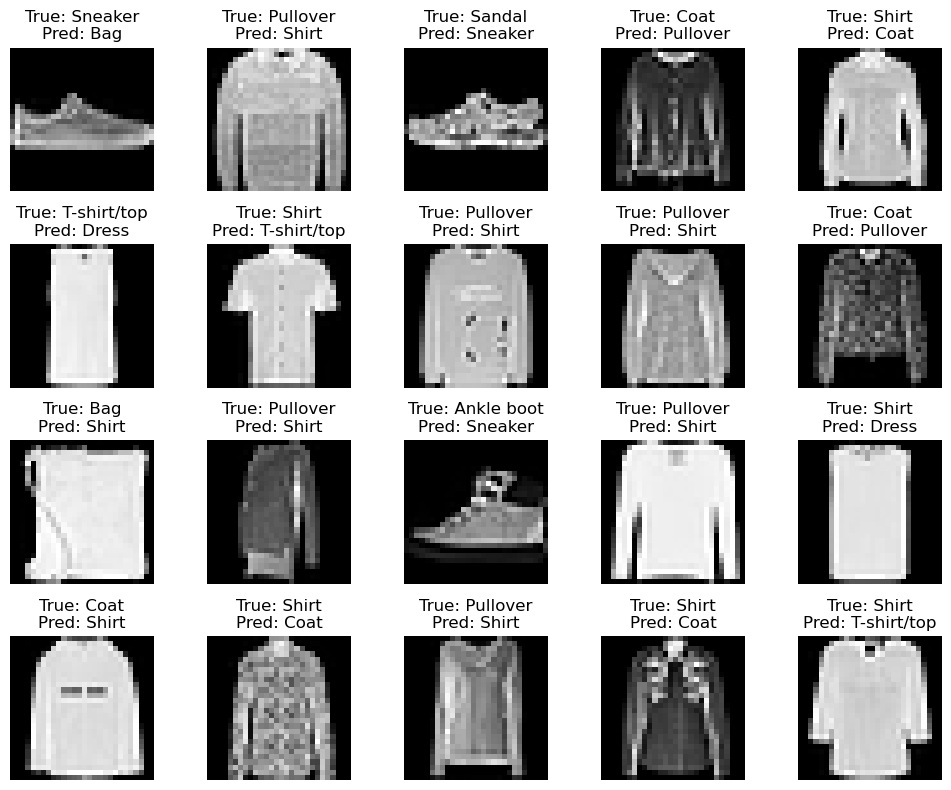

In [11]:
# Make predictions
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1) # Get predicted labels, not probabilities

# Print the first 5 predictions
for i in range(10):
    print(f"Predicted: {class_names[predicted_labels[i]]}, True: {class_names[test_labels[i]]}")
# Find mismatches
wrong_indices = np.where(predicted_labels != test_labels)[0] # Get indices of wrong predictions, not the labels

# Plot a few bad classifications
def plot_wrong_predictions(images, true_labels, pred_labels, indices, class_names, N=10):
    images_per_row = 5
    rows = math.ceil(N / images_per_row)
    plt.figure(figsize=(images_per_row * 2, rows * 2))
    for i in range(N):
        idx = indices[i]
        plt.subplot(rows, images_per_row, i + 1)
        plt.imshow(images[idx], cmap='gray')
        plt.title(f"True: {class_names[true_labels[idx]]}\nPred: {class_names[pred_labels[idx]]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_wrong_predictions(test_images, test_labels, predicted_labels, wrong_indices, class_names, N=20)
